In [1]:
from sklearn import tree
from sklearn import neighbors
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
df = pd.read_csv('nj_teachers_salaries_2016.csv')

In [3]:
df.certificate = df.certificate.map({'Standard certificate': 0, 'CEAS': 1,'Provisional': 2,'CE': 3,'Emergency': 4,'Non Citizen': 5,'X': 6})

In [4]:
df.subcategory = df.subcategory.map({'General ed': 0, 'Special  ed': 1, 'Hearing': 2, 'Admin or supervisor': 2, 'Bilingual': 2, 'Visual': 2})

In [5]:
df.teaching_route = df.teaching_route.map({'Traditional': 0, 'Alternate' : 1, 'X' : 2})

In [6]:
df.highly_qualified = df.highly_qualified.map({'Not highly qualified': 0, "Doesn't need to be highly qualified" : 1, 'Highly qualified. Passed the Praxis/NTE' : 2, 'Highly qualified, House Matrix' : 3, 'Highly qualified. Has 30 credits in content area.' : 4, 'Highly qualified. Has gradate or undergraduate degree in subject area.': 5, 'Highly qualified. National Board Certified.': 6, 'Nationally Board Certified': 7})

In [7]:
df.highly_qualified.unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [8]:
df = df.drop(['last_name', 'first_name', 'county', 'district', 'school', 'primary_job', 'subcategory', 'highly_qualified'],axis=1)
# Eliminando la columna "highly_qualified" da mejor score

In [9]:
df.head()

,fte,salary,certificate,teaching_route,experience_district,experience_nj,experience_total
0,1.0,98774,0.0,0,13.0,13.0,13.0
1,1.0,118415,0.0,0,16.0,16.0,16.0
2,0.8,98774,0.0,0,13.0,13.0,15.0
3,1.0,66184,0.0,1,16.0,16.0,16.0
4,1.0,101866,0.0,0,12.0,12.0,12.0


In [10]:
df.describe()

,fte,salary,certificate,teaching_route,experience_district,experience_nj,experience_total
count,138636.000000,138715.000000,138713.000000,138715.000000,138186.000000,138057.000000,138046.000000
mean,0.950143,73990.322568,0.210218,0.117240,10.540170,11.824406,12.122734
std,0.159065,22864.474846,0.659033,0.322915,8.288531,8.729652,8.881645
min,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,57227.500000,0.000000,0.000000,3.000000,4.000000,5.000000
50%,1.000000,68918.000000,0.000000,0.000000,10.000000,11.000000,11.000000
75%,1.000000,87201.000000,0.000000,0.000000,15.000000,17.000000,17.000000
max,1.000000,297625.000000,6.000000,2.000000,62.000000,62.000000,62.000000


In [11]:
df.experience_total = df.experience_total.fillna(df.experience_total.mean())
df.experience_nj = df.experience_nj.fillna(df.experience_nj.mean())
df.experience_district = df.experience_district.fillna(df.experience_district.mean())
df.certificate = df.certificate.fillna(0) #Es una mala practica pero como solo son 2 filas no afecta en el resultado
df.fte = df.fte.fillna(df.fte.mean())

In [12]:
df.certificate.unique()

array([0., 1., 2., 3., 4., 5., 6.])

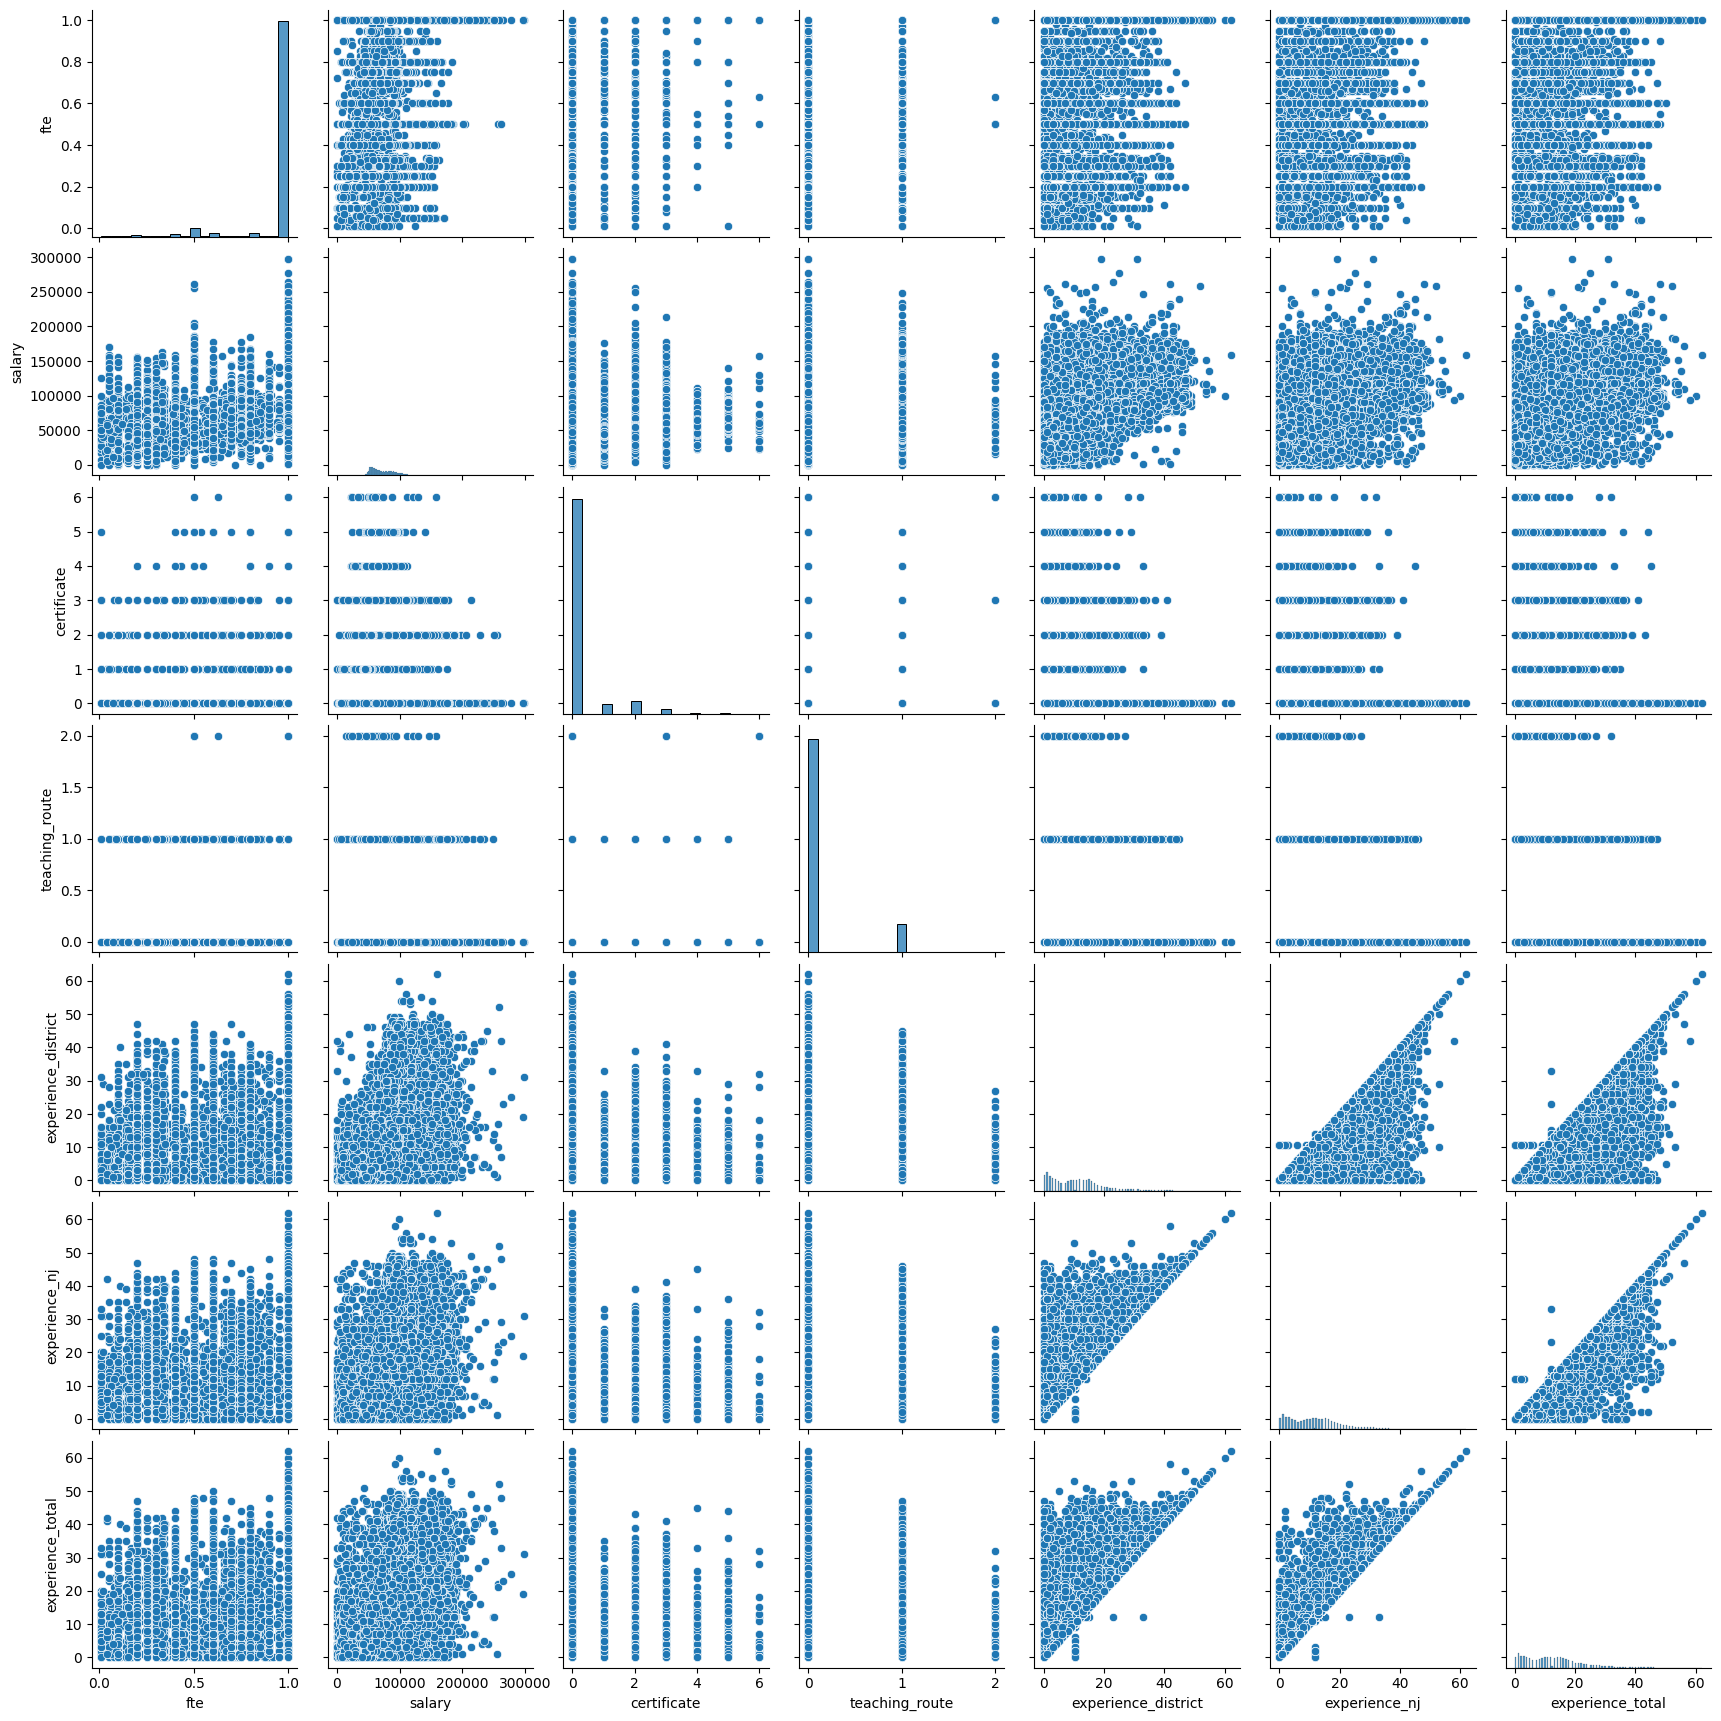

In [13]:
sb.pairplot(df)

In [14]:
data_x = df.drop('teaching_route', axis=1)
data_y = df.teaching_route

In [15]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.1)

In [16]:
decission_tree = tree.DecisionTreeClassifier()
k_neighbors = neighbors.KNeighborsClassifier(n_neighbors=7)

In [17]:
decission_tree.fit(train_x, train_y)
k_neighbors.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=7)

In [18]:
print(f'Score Decision Tree = {round(decission_tree.score(test_x, test_y),2)*100}%')
print(f'Score K_Neighbors = {round(k_neighbors.score(test_x, test_y),2)*100}%')

Score Decision Tree = 84.0%
Score K_Neighbors = 88.0%
